In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import umap
import umap.plot
import pickle
import matplotlib
import numpy as np
from util import modeling

In [2]:
lenet_stats = pd.read_csv('../summary_stats/lenet_stats.csv',index_col=0)

In [3]:
lenet_stats

,model,beta,rep_loss,val_rep_loss,y1_acc,y2_acc,distillation_loss,test_distillation_loss,train_agreement,test_agreement,fog_agreement,stripe_agreement,blur_agreement,rotate_agreement,epochs
0,0.0,-1.000000e+00,0.000009,0.000004,0.9697,0.9704,4.819786e-06,6.991446e-08,0.994633,0.9926,0.6550,0.9535,0.9610,0.9666,2.0
1,0.0,1.000000e-10,0.010005,0.009313,0.9822,0.9846,2.003287e-05,-1.486066e-07,0.999433,0.9903,0.8469,0.9221,0.9166,0.9415,13.0
2,0.0,7.742637e-10,0.003942,0.004229,0.9853,0.9850,3.710348e-08,0.000000e+00,1.000000,0.9936,0.6159,0.8907,0.9583,0.9596,16.0
3,0.0,5.994843e-09,0.024391,0.018577,0.9848,0.9831,3.219018e-05,-4.058053e-08,0.999900,0.9919,0.8169,0.7531,0.9430,0.9463,24.0
4,0.0,4.641589e-08,0.003717,0.002699,0.9844,0.9845,2.258448e-08,-4.635754e-08,1.000000,0.9962,0.9028,0.9176,0.9624,0.9696,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,19.0,2.782559e-06,0.940799,0.921071,0.9843,0.9849,-7.263417e-10,0.000000e+00,1.000000,0.9914,0.6983,0.6691,0.9257,0.9399,75.0
216,19.0,2.154435e-05,0.975481,0.971873,0.9848,0.9830,1.752561e-08,0.000000e+00,1.000000,0.9911,0.0577,0.3791,0.9151,0.9441,99.0
217,19.0,1.668101e-04,0.996000,0.996377,0.9852,0.9851,4.783214e-10,0.000000e+00,1.000000,0.9917,0.0151,0.0726,0.9049,0.9348,99.0
218,19.0,1.291550e-03,0.967509,0.997375,0.9845,0.9860,-2.080083e-08,2.619162e-08,1.000000,0.9906,0.0329,0.2694,0.8980,0.9365,99.0


In [26]:
lenet_stats = lenet_stats[lenet_stats['beta']!=-1]

In [31]:
lenet_baseline_stats = pd.read_csv('../summary_stats/lenet_baseline_stats.csv',index_col=0)

In [32]:
lenet_baseline_stats['fog_agreement'].mean()

0.37557000013950625

Text(0, 0.5, 'Prediction Agreement')

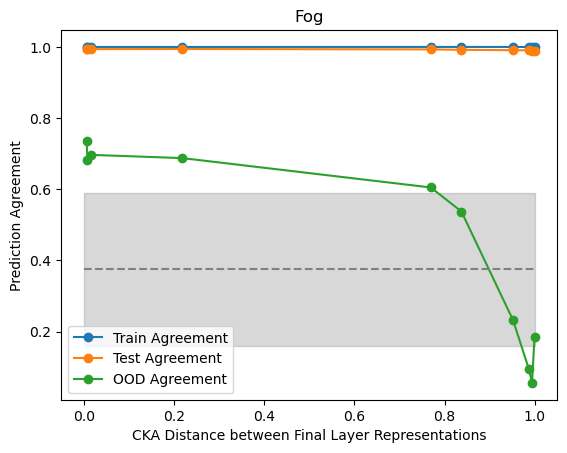

In [38]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['fog_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['fog_agreement'].mean()
baseline_std = lenet_baseline_stats['fog_agreement'].std()
plt.hlines(baseline_mean,0,1,color='grey',ls='dashed')
plt.fill_between([0,1],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Fog')
plt.xlabel('CKA Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

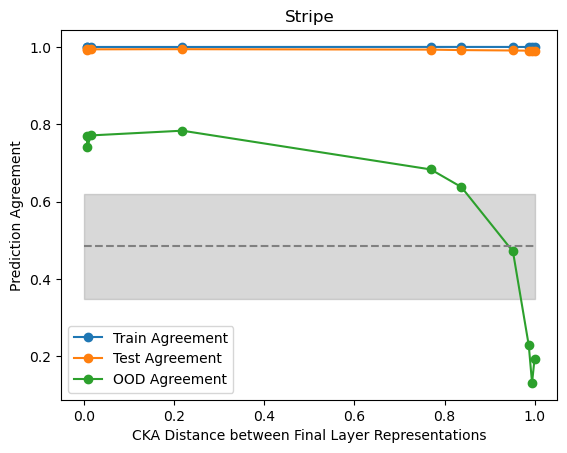

In [39]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['stripe_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['stripe_agreement'].mean()
baseline_std = lenet_baseline_stats['stripe_agreement'].std()
plt.hlines(baseline_mean,0,1,color='grey',ls='dashed')
plt.fill_between([0,1],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Stripe')
plt.xlabel('CKA Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

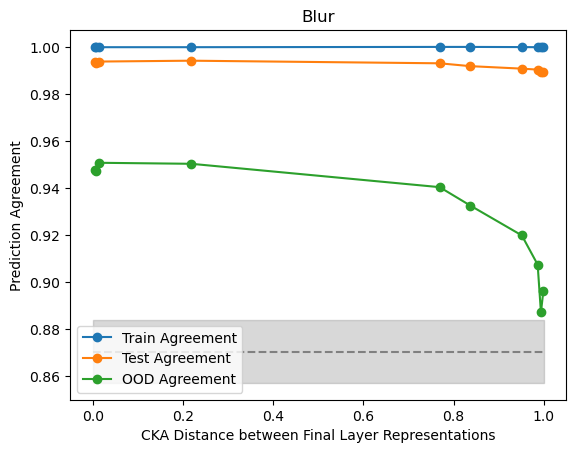

In [41]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['blur_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['motion_blur_agreement'].mean()
baseline_std = lenet_baseline_stats['motion_blur_agreement'].std()
plt.hlines(baseline_mean,0,1,color='grey',ls='dashed')
plt.fill_between([0,1],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Blur')
plt.xlabel('CKA Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

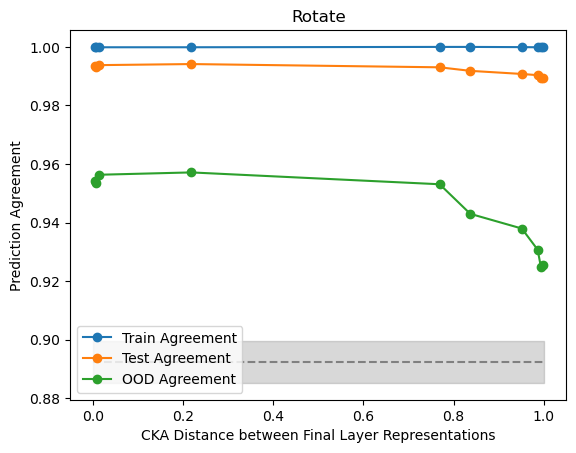

In [42]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['rotate_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['rotate_agreement'].mean()
baseline_std = lenet_baseline_stats['rotate_agreement'].std()
plt.hlines(baseline_mean,0,1,color='grey',ls='dashed')
plt.fill_between([0,1],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0.8,1.1)
plt.title('Rotate')
plt.xlabel('CKA Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

# Procrustes

In [62]:
lenet_stats = pd.read_csv('../summary_stats/lenet_procrustes_stats.csv',index_col=0)

Text(0, 0.5, 'Prediction Agreement')

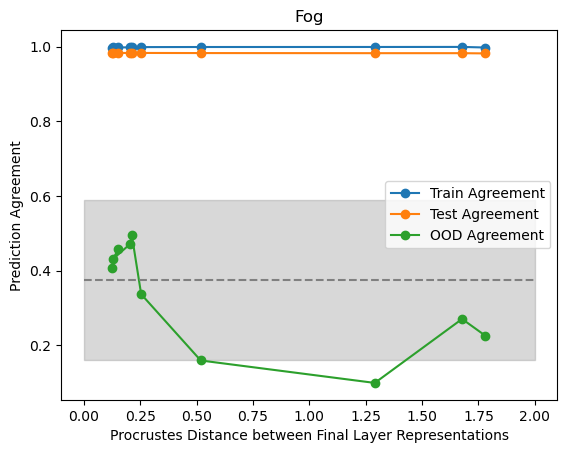

In [63]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['fog_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['fog_agreement'].mean()
baseline_std = lenet_baseline_stats['fog_agreement'].std()
plt.hlines(baseline_mean,0,2,color='grey',ls='dashed')
plt.fill_between([0,2],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Fog')
plt.xlabel('Procrustes Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

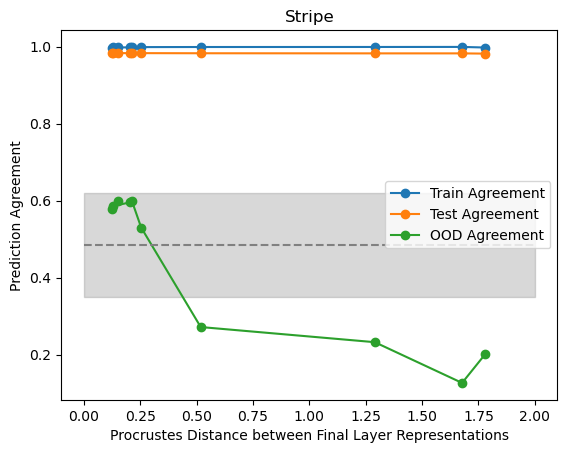

In [64]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['stripe_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['stripe_agreement'].mean()
baseline_std = lenet_baseline_stats['stripe_agreement'].std()
plt.hlines(baseline_mean,0,2,color='grey',ls='dashed')
plt.fill_between([0,2],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Stripe')
plt.xlabel('Procrustes Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

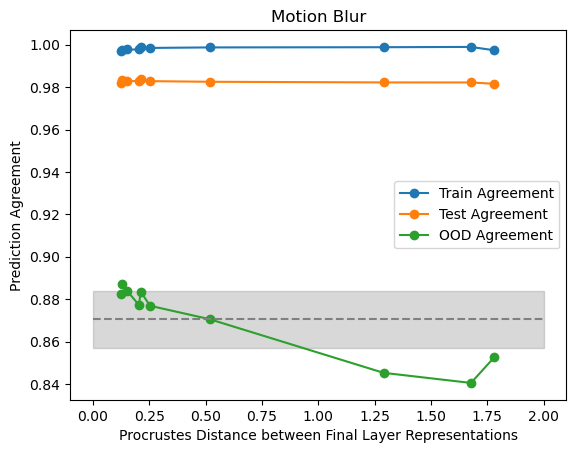

In [65]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['blur_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['motion_blur_agreement'].mean()
baseline_std = lenet_baseline_stats['motion_blur_agreement'].std()
plt.hlines(baseline_mean,0,2,color='grey',ls='dashed')
plt.fill_between([0,2],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Motion Blur')
plt.xlabel('Procrustes Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

Text(0, 0.5, 'Prediction Agreement')

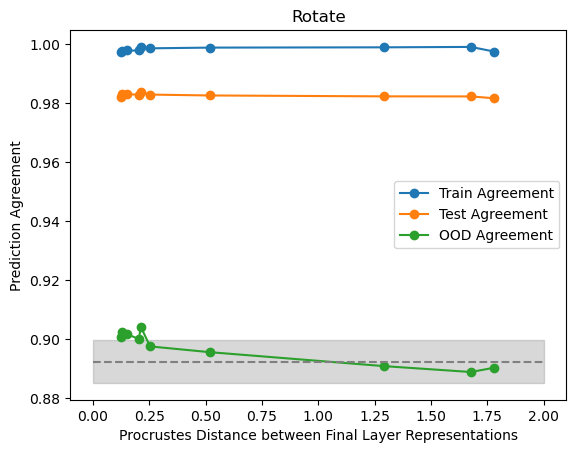

In [66]:
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['train_agreement'].mean(),
         label='Train Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['test_agreement'].mean(),
         label='Test Agreement',marker='o')
plt.plot(lenet_stats.groupby('beta')['rep_loss'].mean(),
         lenet_stats.groupby('beta')['rotate_agreement'].mean(),
         label='OOD Agreement',marker='o')
baseline_mean = lenet_baseline_stats['rotate_agreement'].mean()
baseline_std = lenet_baseline_stats['rotate_agreement'].std()
plt.hlines(baseline_mean,0,2,color='grey',ls='dashed')
plt.fill_between([0,2],baseline_mean-baseline_std,baseline_mean+baseline_std,color='grey',alpha=0.3)
plt.legend()
# plt.ylim(0,1.1)
plt.title('Rotate')
plt.xlabel('Procrustes Distance between Final Layer Representations')
plt.ylabel('Prediction Agreement')

# UMAP

## Procrustes

In [84]:
activations_A_1e10 = pickle.load(open('../activations/procrustes/A_test_iteration_0_beta_1e-10.pkl','rb'))
activations_A_1e10,labels = activations_A_1e10['activations'],activations_A_1e10['labels']

activations_A_1e1 = pickle.load(open('../activations/procrustes/A_test_iteration_0_beta_0.01.pkl','rb'))
activations_A_1e1,_ = activations_A_1e1['activations'],activations_A_1e1['labels']

activations_B_1e10 = pickle.load(open('../activations/procrustes/B_test_iteration_0_beta_1e-10.pkl','rb'))
activations_B_1e10,_ = activations_B_1e10['activations'],activations_B_1e10['labels']

activations_B_1e1 = pickle.load(open('../activations/procrustes/B_test_iteration_0_beta_0.01.pkl','rb'))
activations_B_1e1,_ = activations_B_1e1['activations'],activations_B_1e1['labels']

In [85]:
reducer_A_1e10 = umap.UMAP()
mapper_A_1e10 = reducer_A_1e10.fit(activations_A_1e10)

reducer_A_1e1 = umap.UMAP()
mapper_A_1e1 = reducer_A_1e1.fit(activations_A_1e1)

reducer_B_1e10 = umap.UMAP()
mapper_B_1e10 = reducer_B_1e10.fit(activations_B_1e10)

reducer_B_1e1 = umap.UMAP()
mapper_B_1e1 = reducer_B_1e1.fit(activations_B_1e1)

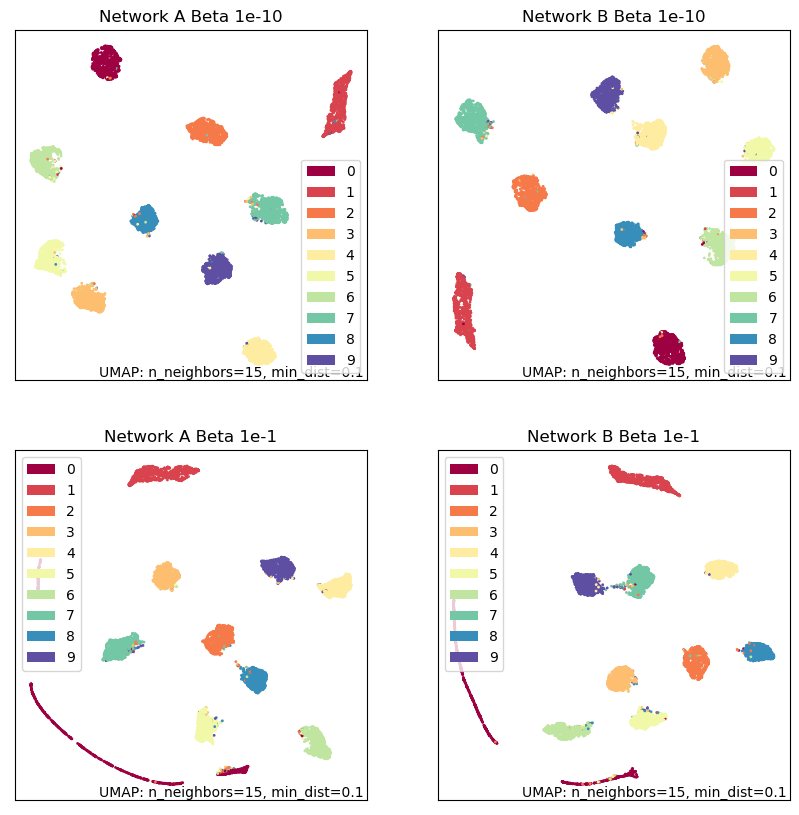

In [89]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
umap.plot.points(mapper_A_1e10,labels=labels,ax=ax[0,0])
umap.plot.points(mapper_A_1e1,labels=labels,ax=ax[1,0])
umap.plot.points(mapper_B_1e10,labels=labels,ax=ax[0,1])
umap.plot.points(mapper_B_1e1,labels=labels,ax=ax[1,1])

ax[0,0].set_title('Network A Beta 1e-10')
ax[1,0].set_title('Network A Beta 1e-1')
ax[0,1].set_title('Network B Beta 1e-10')
ax[1,1].set_title('Network B Beta 1e-1')
plt.show()

In [90]:
reducer = umap.UMAP()
mapper = reducer.fit(activations_A_1e10)

In [96]:
embedding_A_1e1 = reducer.transform(activations_A_1e1)
embedding_B_1e10 = reducer.transform(activations_B_1e10)
embedding_B_1e1 = reducer.transform(activations_B_1e1)

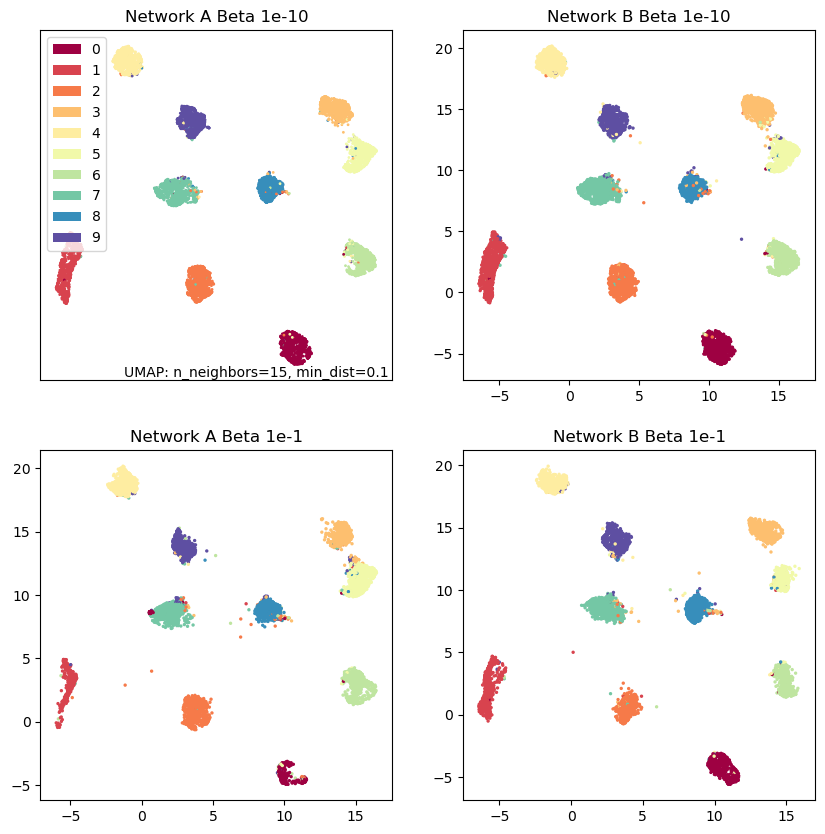

In [106]:
def _to_hex(arr):
    return [matplotlib.colors.to_hex(c) for c in arr]

color_key = _to_hex(
                plt.get_cmap('Spectral')(np.linspace(0, 1, 10))
            )

fig,ax = plt.subplots(2,2,figsize=(10,10))
umap.plot.points(mapper,labels=labels,ax=ax[0,0])
ax[1,0].scatter(embedding_A_1e1[:,0],embedding_A_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[0,1].scatter(embedding_B_1e10[:,0],embedding_B_1e10[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[1,1].scatter(embedding_B_1e1[:,0],embedding_B_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)

ax[0,0].set_title('Network A Beta 1e-10')
ax[1,0].set_title('Network A Beta 1e-1')
ax[0,1].set_title('Network B Beta 1e-10')
ax[1,1].set_title('Network B Beta 1e-1')
plt.show()

In [112]:
modeling.lin_cka_dist_2(activations_A_1e1[:1000],activations_B_1e1[:1000]).numpy()

0.021376908

In [113]:
modeling.procrustes_2(activations_A_1e1[:1000],activations_B_1e1[:1000]).numpy()

1.8784713

## CKA

In [139]:
activations_A_1e10 = pickle.load(open('../activations/cka/A_test_iteration_0_beta_1e-10.pkl','rb'))
activations_A_1e10,labels = activations_A_1e10['activations'],activations_A_1e10['labels']

activations_A_1e1 = pickle.load(open('../activations/cka/A_test_iteration_0_beta_0.1.pkl','rb'))
activations_A_1e1,_ = activations_A_1e1['activations'],activations_A_1e1['labels']

activations_B_1e10 = pickle.load(open('../activations/cka/B_test_iteration_0_beta_1e-10.pkl','rb'))
activations_B_1e10,_ = activations_B_1e10['activations'],activations_B_1e10['labels']

activations_B_1e1 = pickle.load(open('../activations/cka/B_test_iteration_0_beta_0.1.pkl','rb'))
activations_B_1e1,_ = activations_B_1e1['activations'],activations_B_1e1['labels']

In [145]:
activations_A_stripe_1e10 = pickle.load(open('../activations/cka/A_stripe_iteration_0_beta_1e-10.pkl','rb'))
activations_A_stripe_1e10,_ = activations_A_stripe_1e10['activations'],activations_A_stripe_1e10['labels']

activations_A_stripe_1e1 = pickle.load(open('../activations/cka/A_stripe_iteration_0_beta_0.1.pkl','rb'))
activations_A_stripe_1e1,_ = activations_A_stripe_1e1['activations'],activations_A_stripe_1e1['labels']

activations_B_stripe_1e10 = pickle.load(open('../activations/cka/B_stripe_iteration_0_beta_1e-10.pkl','rb'))
activations_B_stripe_1e10,_ = activations_B_stripe_1e10['activations'],activations_B_stripe_1e10['labels']

activations_B_stripe_1e1 = pickle.load(open('../activations/cka/B_stripe_iteration_0_beta_0.1.pkl','rb'))
activations_B_stripe_1e1,_ = activations_B_stripe_1e1['activations'],activations_B_stripe_1e1['labels']

In [115]:
reducer_A_1e10 = umap.UMAP()
mapper_A_1e10 = reducer_A_1e10.fit(activations_A_1e10)

reducer_A_1e1 = umap.UMAP()
mapper_A_1e1 = reducer_A_1e1.fit(activations_A_1e1)

reducer_B_1e10 = umap.UMAP()
mapper_B_1e10 = reducer_B_1e10.fit(activations_B_1e10)

reducer_B_1e1 = umap.UMAP()
mapper_B_1e1 = reducer_B_1e1.fit(activations_B_1e1)

In [158]:
embedding_A_stripe_1e10 = reducer_A_1e10.transform(activations_A_stripe_1e10[0].reshape(1,-1))
embedding_B_stripe_1e10 = reducer_B_1e10.transform(activations_B_stripe_1e10[0].reshape(1,-1))
embedding_A_stripe_1e1 = reducer_A_1e1.transform(activations_A_stripe_1e1[0].reshape(1,-1))
embedding_B_stripe_1e1 = reducer_B_1e1.transform(activations_B_stripe_1e1[0].reshape(1,-1))

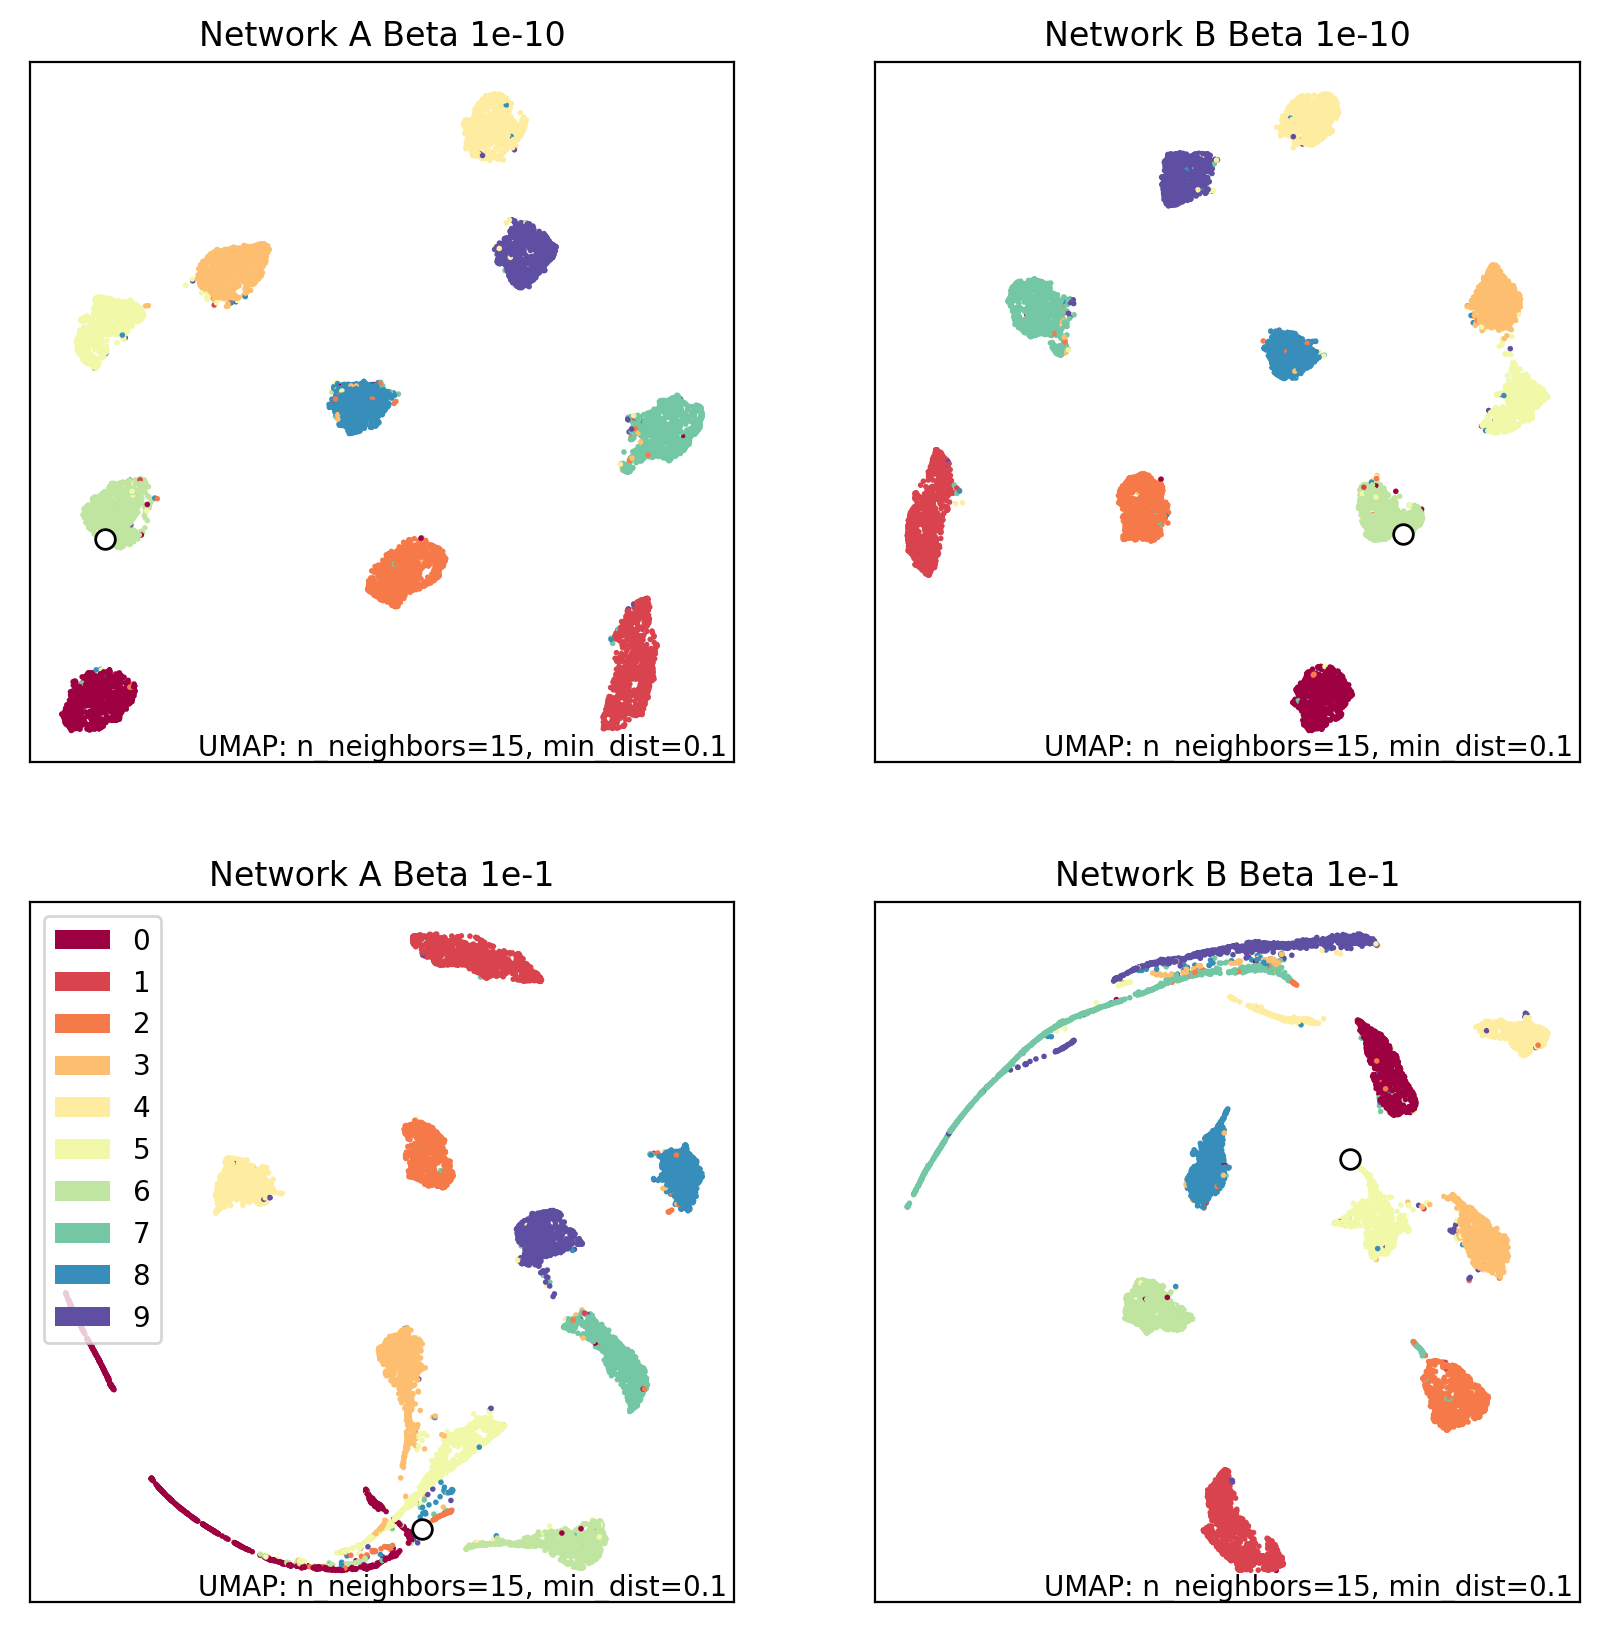

In [159]:
fig,ax = plt.subplots(2,2,figsize=(10,10),dpi=200)
umap.plot.points(mapper_A_1e10,labels=labels,ax=ax[0,0],show_legend=False)
umap.plot.points(mapper_A_1e1,labels=labels,ax=ax[1,0])
umap.plot.points(mapper_B_1e10,labels=labels,ax=ax[0,1],show_legend=False)
umap.plot.points(mapper_B_1e1,labels=labels,ax=ax[1,1],show_legend=False)

ax[0,0].scatter(embedding_A_stripe_1e10[:,0],embedding_A_stripe_1e10[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[1,0].scatter(embedding_A_stripe_1e1[:,0],embedding_A_stripe_1e1[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[0,1].scatter(embedding_B_stripe_1e10[:,0],embedding_B_stripe_1e10[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[1,1].scatter(embedding_B_stripe_1e1[:,0],embedding_B_stripe_1e1[:,1],
                facecolor='white',edgecolors='black',s=50)

ax[0,0].set_title('Network A Beta 1e-10')
ax[1,0].set_title('Network A Beta 1e-1')
ax[0,1].set_title('Network B Beta 1e-10')
ax[1,1].set_title('Network B Beta 1e-1')
plt.show()

In [140]:
reducer = umap.UMAP()
mapper = reducer.fit(activations_A_1e10)

In [141]:
embedding_A_1e1 = reducer.transform(activations_A_1e1)
embedding_B_1e10 = reducer.transform(activations_B_1e10)
embedding_B_1e1 = reducer.transform(activations_B_1e1)

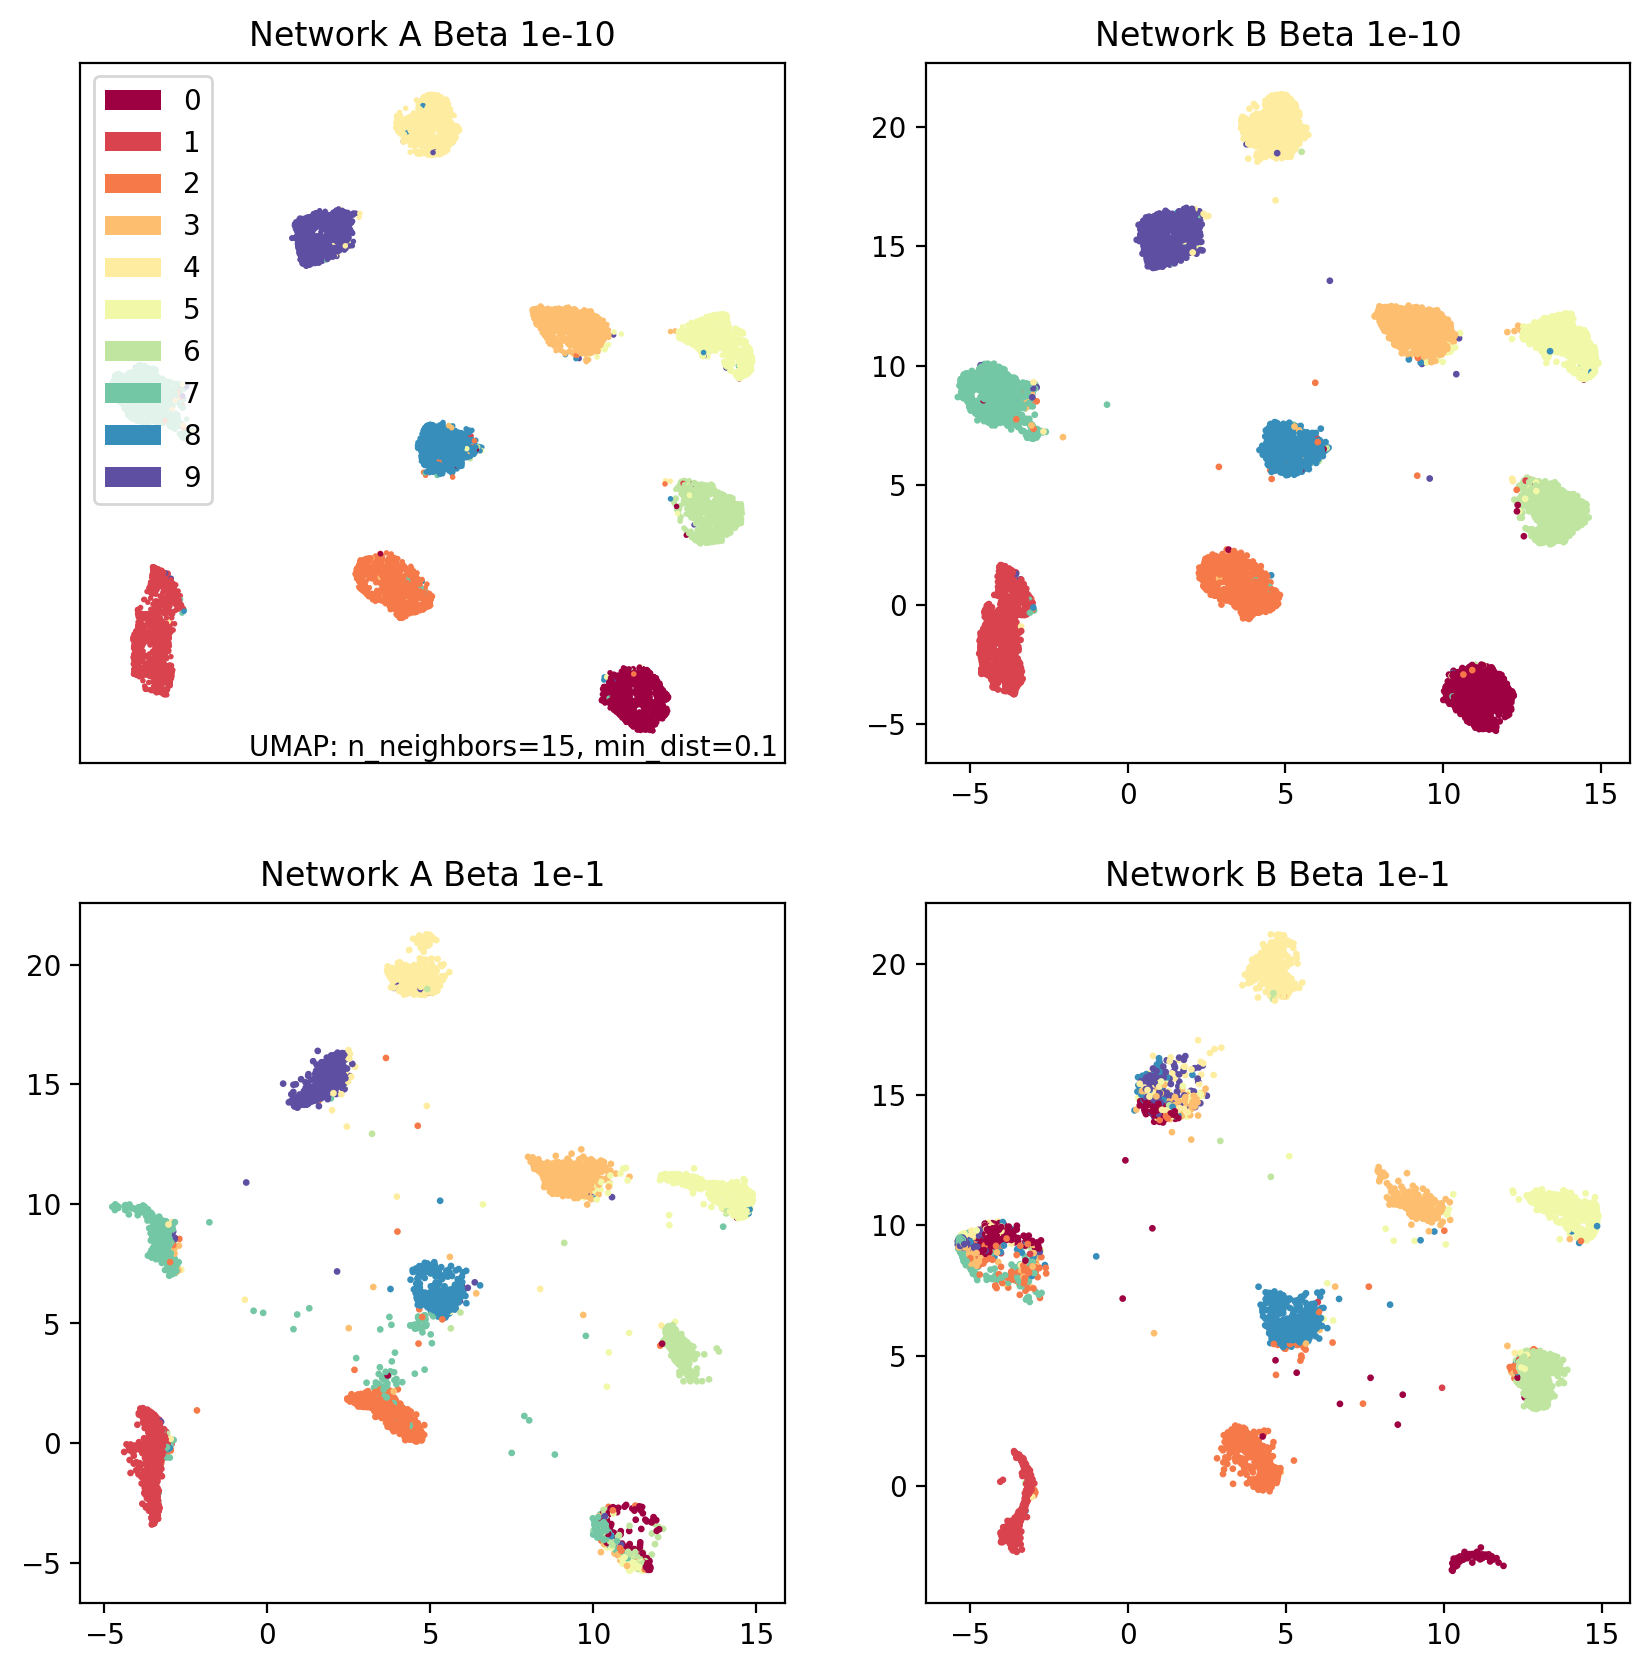

In [142]:
def _to_hex(arr):
    return [matplotlib.colors.to_hex(c) for c in arr]

color_key = _to_hex(
                plt.get_cmap('Spectral')(np.linspace(0, 1, 10))
            )

fig,ax = plt.subplots(2,2,figsize=(10,10),dpi=200)
umap.plot.points(mapper,labels=labels,ax=ax[0,0])
ax[1,0].scatter(embedding_A_1e1[:,0],embedding_A_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[0,1].scatter(embedding_B_1e10[:,0],embedding_B_1e10[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[1,1].scatter(embedding_B_1e1[:,0],embedding_B_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)

ax[0,0].set_title('Network A Beta 1e-10')
ax[1,0].set_title('Network A Beta 1e-1')
ax[0,1].set_title('Network B Beta 1e-10')
ax[1,1].set_title('Network B Beta 1e-1')
plt.show()

In [143]:
modeling.lin_cka_dist_2(activations_A_1e1[:1000],activations_B_1e1[:1000]).numpy()

0.9998063

In [144]:
modeling.procrustes_2(activations_A_1e1[:1000],activations_B_1e1[:1000]).numpy()

1.1877674

In [146]:
embedding_A_stripe_1e10 = reducer.transform(activations_A_stripe_1e10[0].reshape(1,-1))
embedding_B_stripe_1e10 = reducer.transform(activations_B_stripe_1e10[0].reshape(1,-1))
embedding_A_stripe_1e1 = reducer.transform(activations_A_stripe_1e1[0].reshape(1,-1))
embedding_B_stripe_1e1 = reducer.transform(activations_B_stripe_1e1[0].reshape(1,-1))

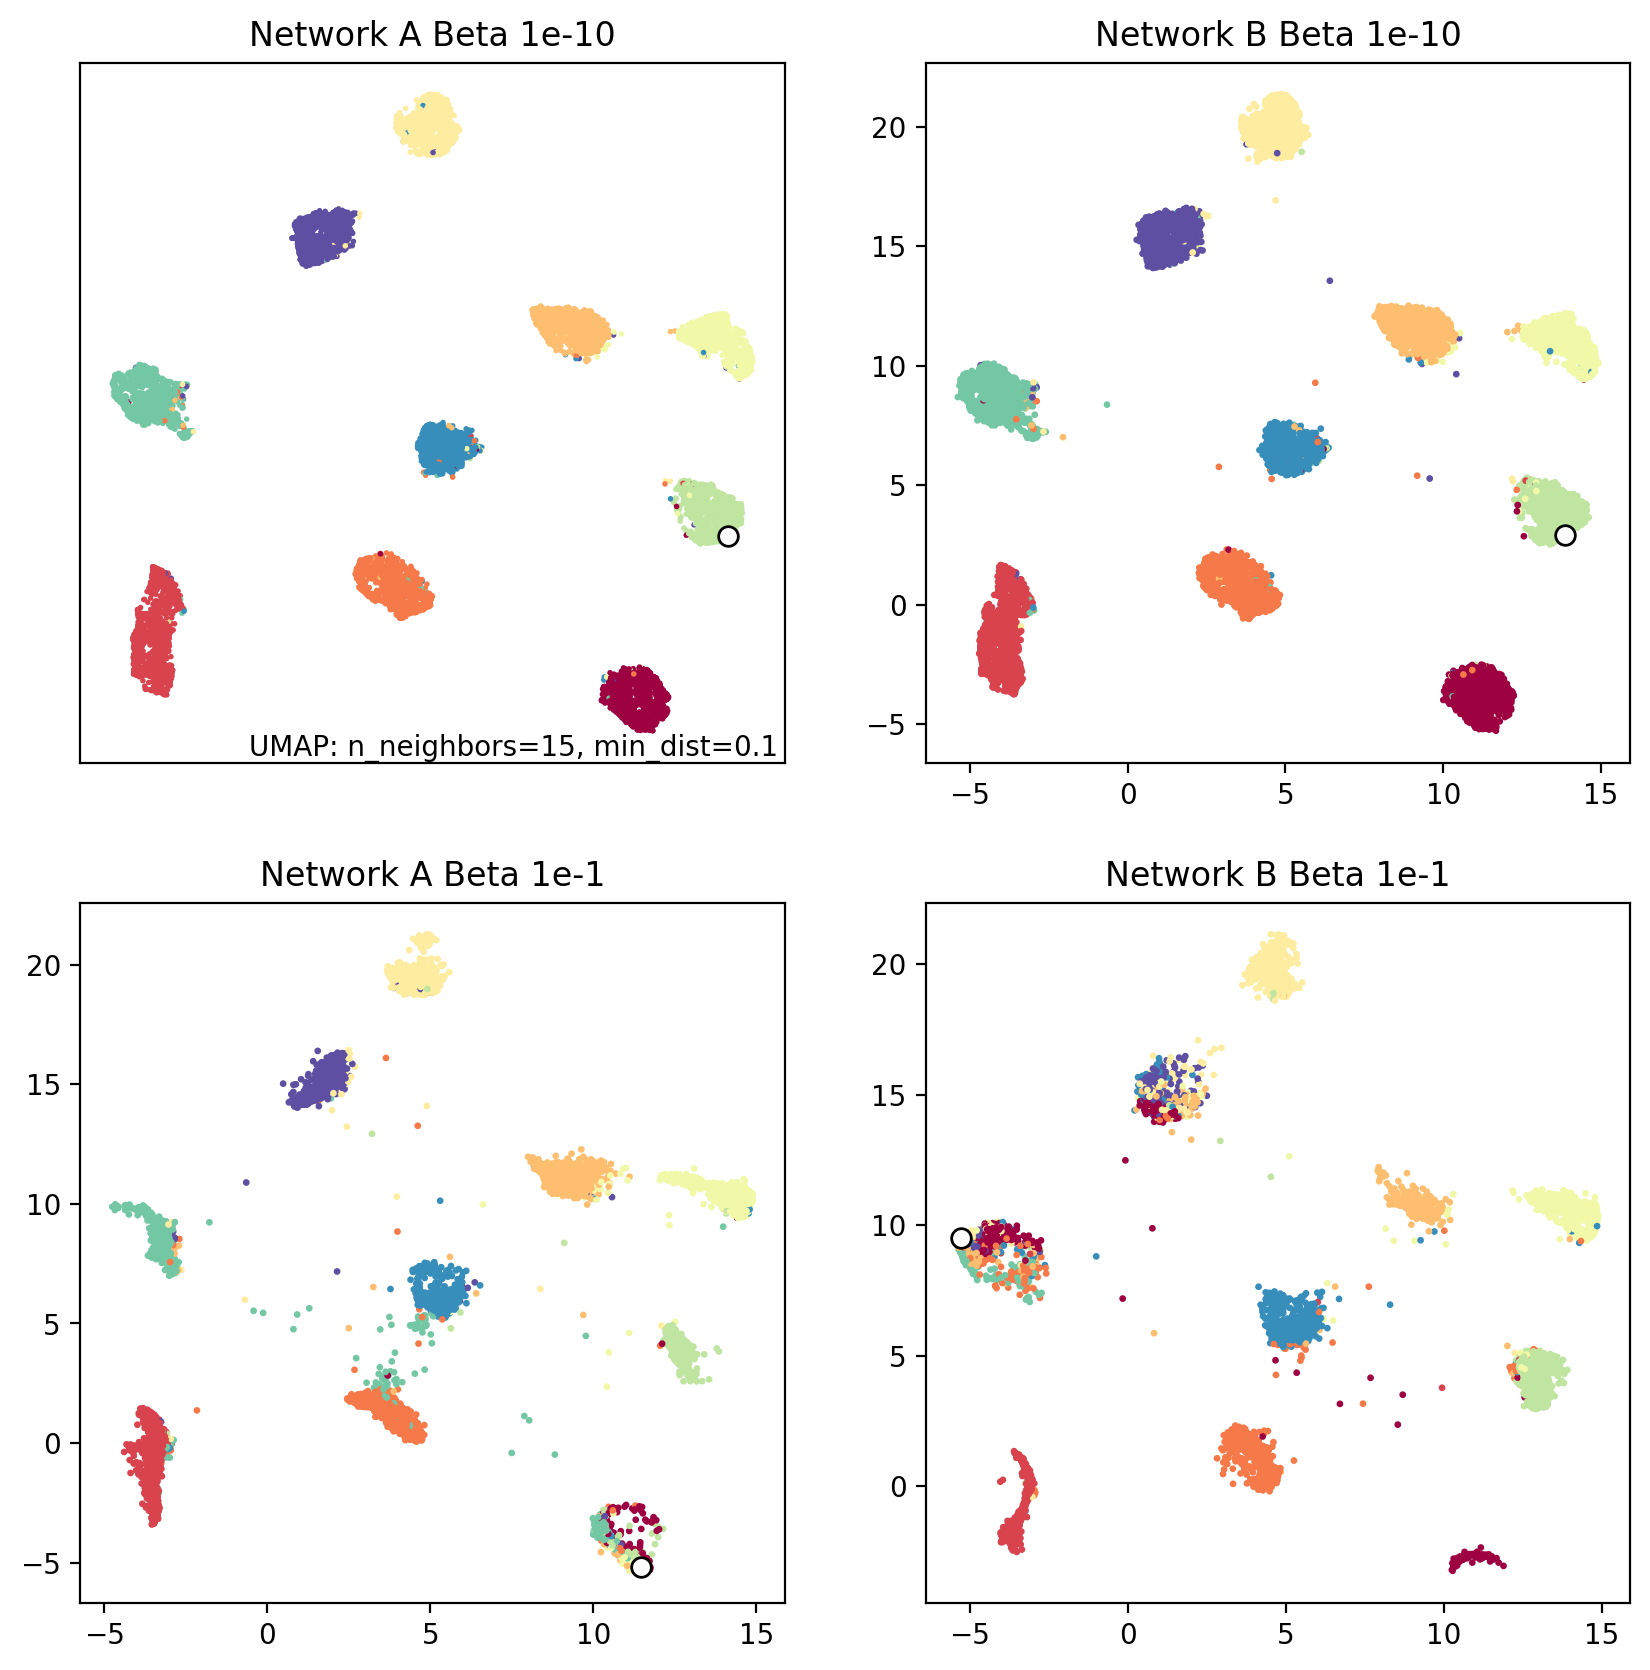

In [157]:
def _to_hex(arr):
    return [matplotlib.colors.to_hex(c) for c in arr]

color_key = _to_hex(
                plt.get_cmap('Spectral')(np.linspace(0, 1, 10))
            )

fig,ax = plt.subplots(2,2,figsize=(10,10),dpi=200)
umap.plot.points(mapper,labels=labels,ax=ax[0,0],show_legend=False)
ax[1,0].scatter(embedding_A_1e1[:,0],embedding_A_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[0,1].scatter(embedding_B_1e10[:,0],embedding_B_1e10[:,1],
                c=[color_key[x] for x in labels],s=2)
ax[1,1].scatter(embedding_B_1e1[:,0],embedding_B_1e1[:,1],
                c=[color_key[x] for x in labels],s=2)

# ax[0,0].scatter(embedding_A_stripe_1e10[:,0],embedding_A_stripe_1e10[:,1],
#                 c='black',s=2)
ax[0,0].scatter(embedding_A_stripe_1e10[:,0],embedding_A_stripe_1e10[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[1,0].scatter(embedding_A_stripe_1e1[:,0],embedding_A_stripe_1e1[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[0,1].scatter(embedding_B_stripe_1e10[:,0],embedding_B_stripe_1e10[:,1],
                facecolor='white',edgecolors='black',s=50)
ax[1,1].scatter(embedding_B_stripe_1e1[:,0],embedding_B_stripe_1e1[:,1],
                facecolor='white',edgecolors='black',s=50)

ax[0,0].set_title('Network A Beta 1e-10')
ax[1,0].set_title('Network A Beta 1e-1')
ax[0,1].set_title('Network B Beta 1e-10')
ax[1,1].set_title('Network B Beta 1e-1')
plt.show()